# Penerapan Algoritma Machine Learning Klasifikasi
- **Nama:** Muhamad Fajri Permana Haryanto
- **Email:** muhamadfajri2804@gmail.com
- **ID Dicoding:** mijimo



# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri. ✅ (https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset) **tapi disinih saya menambahkan 1700 baris lagi, agar analisis bisa berjalan dengan lancar, dan untuk tambahan datannya saya bikin serealistis mungkin**
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas. ✅
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna. ✅ (1000 baris pas)
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: ✅ (Gender, Product Category)
     - *Numerikal*: ✅ (Age, Quantity,Price per Unit,Total Amount)

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan. ✅ (tidak ada)

# **2. Import Library**

liblary python yang digunkaan untuk analisis data dan pembangunan model machine learningclustering ini.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# **3. Memuat Dataset**

Untuk datasetnya, saya simpen digoogle drive ya

In [2]:
retail_df = pd.read_csv("datadicoding/retail_sales_dataset.csv")
retail_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset retail_sales_dataset.csv (retail_df)


## a. **Memahami Struktur Data**

###- Tinjau jumlah baris dan kolom dalam dataset.  
   

In [3]:
retail_df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000
mean,1350.500000,42.642222,4.401481,723.051852,3773.162963
std,779.567188,14.456748,2.777323,604.566482,4367.663187
min,1.000000,18.000000,1.000000,25.000000,25.000000
25%,675.750000,30.000000,2.000000,180.000000,375.000000
50%,1350.500000,43.000000,4.000000,520.000000,1935.000000
75%,2025.250000,55.000000,7.000000,1220.000000,5825.000000
max,2700.000000,69.000000,10.000000,2000.000000,19800.000000


### - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

In [4]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    2700 non-null   int64 
 1   Date              2700 non-null   object
 2   Customer ID       2700 non-null   object
 3   Gender            2700 non-null   object
 4   Age               2700 non-null   int64 
 5   Product Category  2700 non-null   object
 6   Quantity          2700 non-null   int64 
 7   Price per Unit    2700 non-null   int64 
 8   Total Amount      2700 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 190.0+ KB


## b. **Menangani Data yang Hilang**  

   ### - Identifikasi dan analisis data yang hilang (*missing values*).

In [5]:
retail_df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", retail_df.duplicated().sum())

Jumlah duplikasi:  0


### - Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.



**Menghapus beberapa kolom/fitur yang tidak relavan untuk analisis ini**

In [7]:
retail_df.drop(columns=['Transaction ID', 'Customer ID', 'Date'], inplace=True)
retail_df.head()

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,Male,34,Beauty,3,50,150
1,Female,26,Clothing,2,500,1000
2,Male,50,Electronics,1,30,30
3,Male,37,Clothing,1,500,500
4,Male,30,Beauty,2,50,100


## c. **Analisis Distribusi dan Korelasi**  

### - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.

#### 1.Distribusi fitur numerik (histograms)

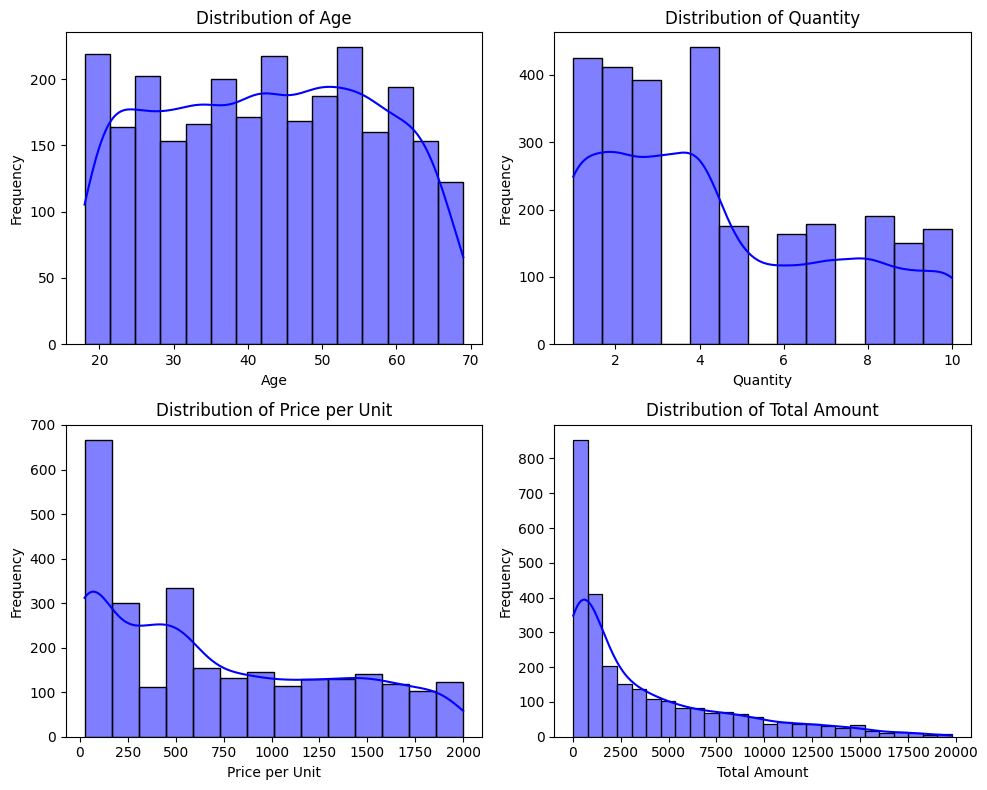

In [8]:
num_features = retail_df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10, 8))
for i, column in enumerate(num_features, 1):
    plt.subplot(2, (len(num_features) + 1) // 2, i)
    sns.histplot(retail_df[column], kde=True, color="blue")
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### 2. Distribusi fitur numerik (Boxplots)

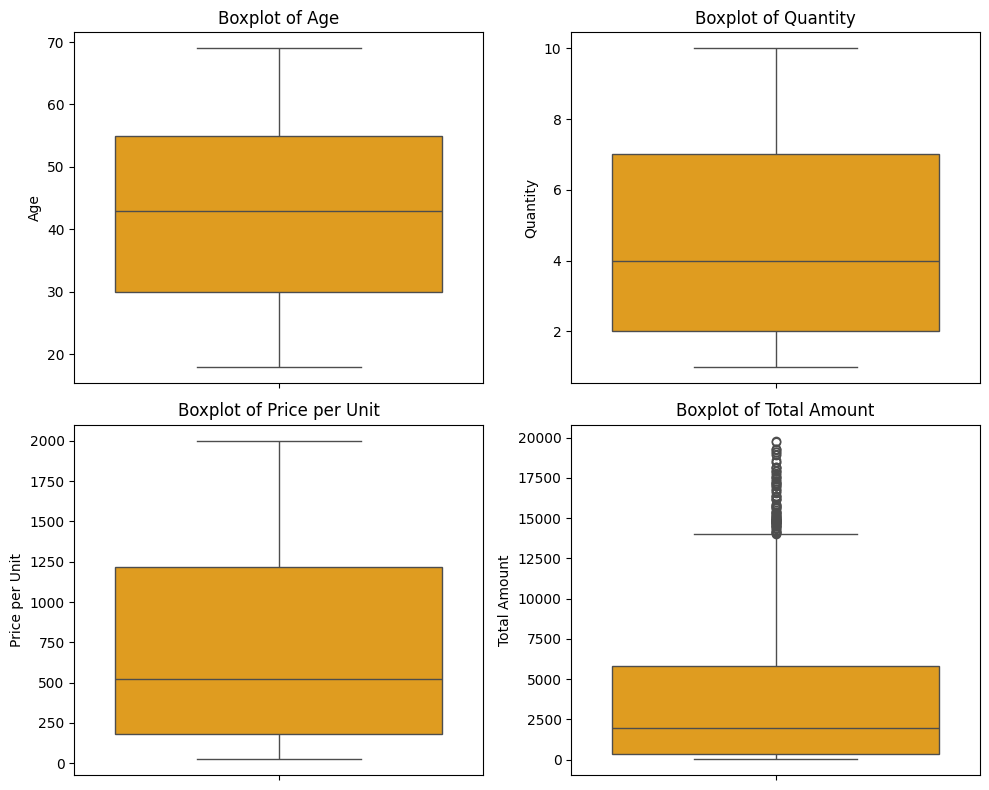

In [9]:
plt.figure(figsize=(10, 8))
for i, column in enumerate(num_features, 1):
    plt.subplot(2, (len(num_features) + 1) // 2, i)
    sns.boxplot(data=retail_df, y=column, color="orange")
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

 - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

**Pairplot untuk fitur numerik**

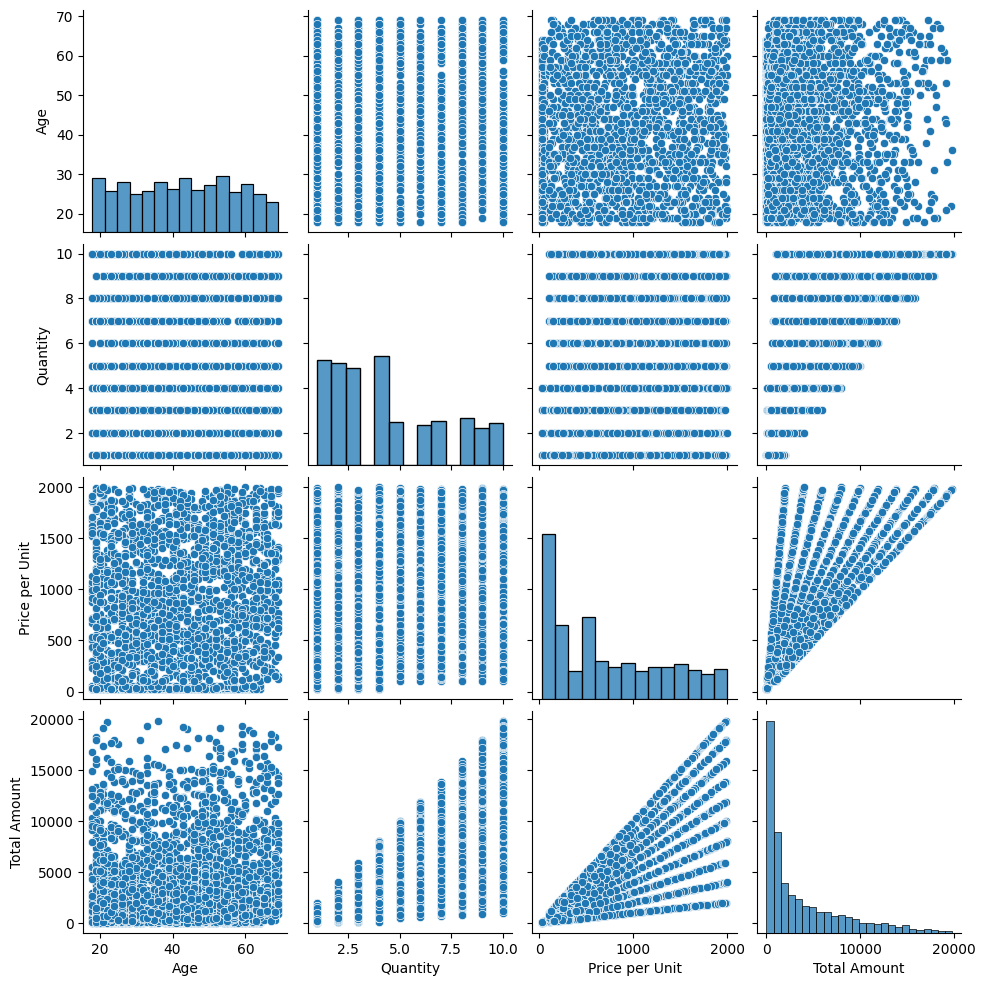

In [10]:
sns.pairplot(retail_df[num_features])
plt.show()

## d. **Visualisasi Data**  


 ### - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  

**Distribusi fitur kategorikal**

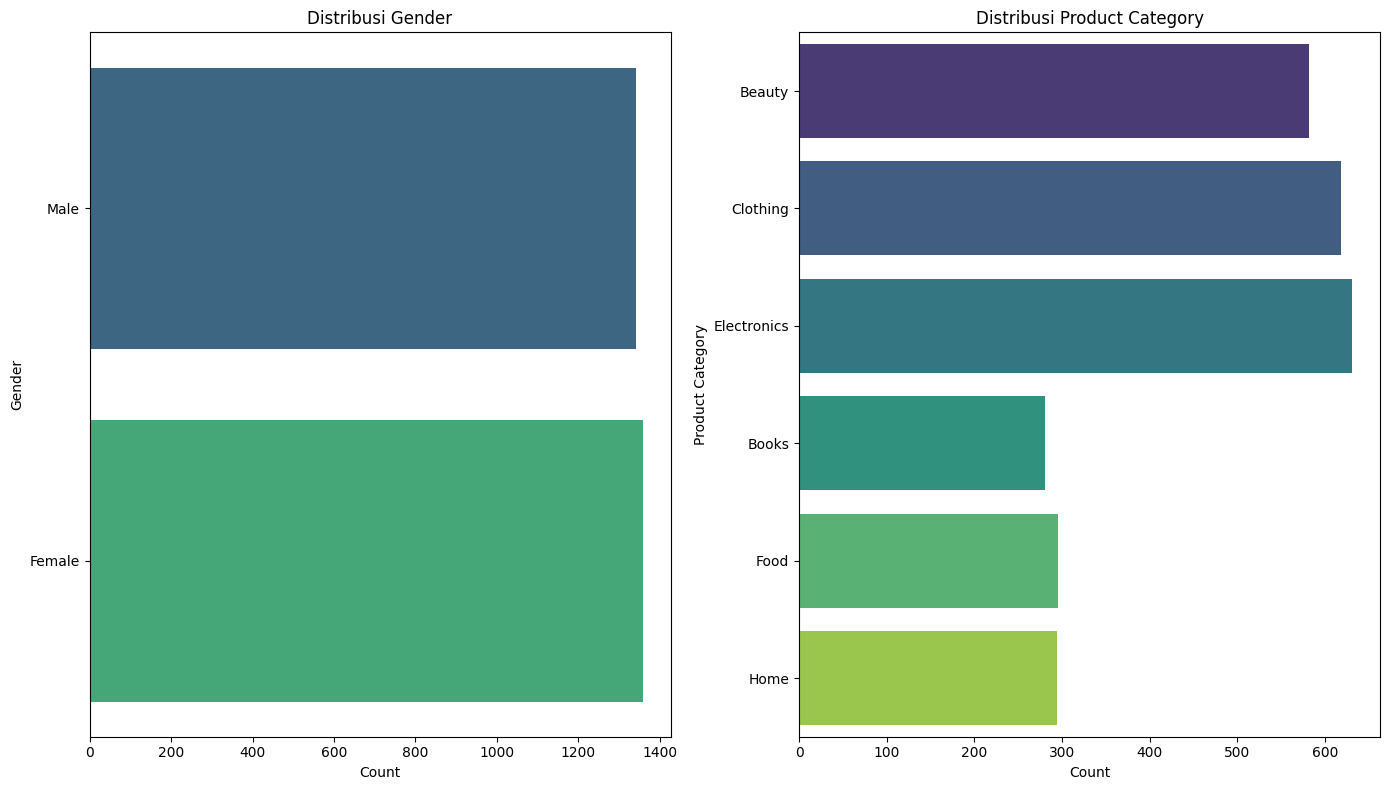

In [11]:
cat_features = retail_df.select_dtypes(include=['object']).columns
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features, 1):
    plt.subplot(1, len(cat_features), i)
    sns.countplot(y=retail_df[column], palette='viridis', hue=retail_df[column], legend=False)
    plt.title(f'Distribusi {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

### - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.



**Heatmap korelasi untuk fitur numerik**

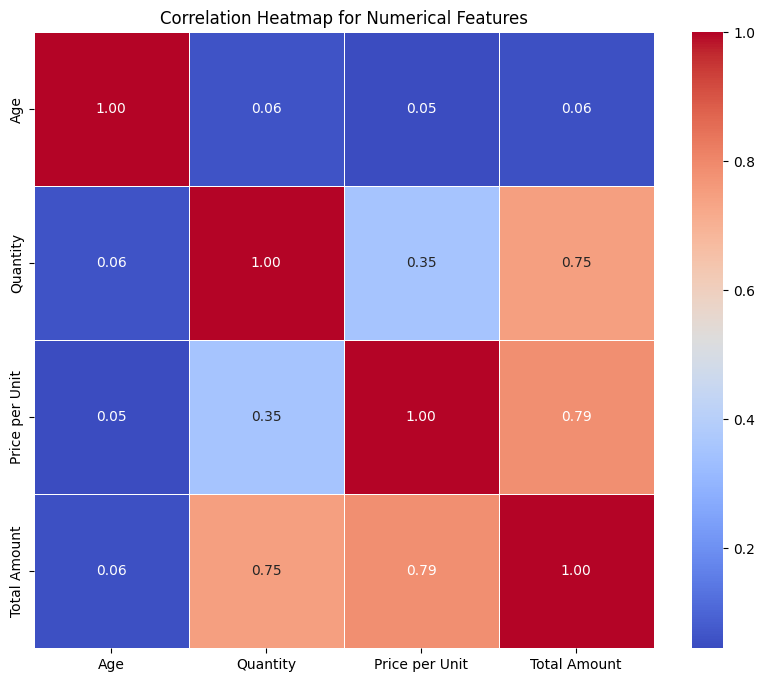

In [12]:
plt.figure(figsize=(10, 8))
correlation_matrix = retail_df[num_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Numerical Features")
plt.show()

# **5. Data Preprocessing**


Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:



## **a. Menghapus atau Menangani Data Kosong (Missing Values)**

In [13]:
retail_df.isnull().sum()

Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Berdasarkan dari pengecekan awal, data set inih **tidak ditemukan Missing Value** yang berarti data set yang saya inih lumayan bagus ✅

## **b. Menghapus Data Duplikat**


In [14]:
print("Jumlah duplikasi: ", retail_df.duplicated().sum())

Jumlah duplikasi:  90


In [15]:
# Menampilkan beberapa baris duplikat
retail_df[retail_df.duplicated()].head()

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
41,Male,22,Clothing,3,300,900
107,Female,27,Beauty,3,25,75
130,Female,21,Beauty,2,300,600
172,Male,64,Electronics,4,30,120
317,Male,61,Clothing,1,25,25


Berdasarkan dari pengecekan awal, data set inih **tidak ditemukan duplikasi data** namun setelah penghapusan kolom/fitur (Date) terjadi dupliaksi, mungkin terjadi karena ada jumlah pada baris yang sama/nilai dari kolom (age, quantanty dan price per unit yang sama) walapun berbeda tanggal transaksi, tapi kolom date dihapus, di karena kan saya mau **analisis untuk mengelompokkan berdasarkan quantity dan spending untuk clustering** maka duplikasinya saya akan hapus. jadi **diambil perwakilannya ajah (data tidak duplikatnnya)**

In [16]:
retail_df = retail_df.drop_duplicates()

In [17]:
print("Jumlah duplikasi: ", retail_df.duplicated().sum())

Jumlah duplikasi:  0


Berdasarkan keputusan yang saya ambil duplikasi pada dataset inih berhasil teratasi ✅

## **c. Normalisasi atau Standarisasi Fitur**


In [18]:
# Normalisasi dan standarisasi fitur numerik
scaler = StandardScaler()
retail_df[num_features] = scaler.fit_transform(retail_df[num_features])

retail_df[num_features].head()

,Age,Quantity,Price per Unit,Total Amount
0,-0.592433,-0.524125,-1.143912,-0.850306
1,-1.144961,-0.882137,-0.400108,-0.656939
2,0.512623,-1.240150,-1.176970,-0.877605
3,-0.385235,-1.240150,-0.400108,-0.770684
4,-0.868697,-0.882137,-1.143912,-0.861681


## **d. Deteksi dan Penanganan Outlier**


In [19]:
# Mendeteksi outlier pada fitur numerikal
for column in num_features:
    Q1 = retail_df[column].quantile(0.25)
    Q3 = retail_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = retail_df[(retail_df[column] < lower_bound) | (retail_df[column] > upper_bound)]
    print(f"Mendeteksi outliers pada kolom {column}:")
    outliers.head()

Mendeteksi outliers pada kolom Age:
Mendeteksi outliers pada kolom Quantity:
Mendeteksi outliers pada kolom Price per Unit:
Mendeteksi outliers pada kolom Total Amount:


In [20]:
retail_df.head()

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,Male,-0.592433,Beauty,-0.524125,-1.143912,-0.850306
1,Female,-1.144961,Clothing,-0.882137,-0.400108,-0.656939
2,Male,0.512623,Electronics,-1.240150,-1.176970,-0.877605
3,Male,-0.385235,Clothing,-1.240150,-0.400108,-0.770684
4,Male,-0.868697,Beauty,-0.882137,-1.143912,-0.861681


## **e. Encoding Data Kategorikal**


### 1. Label Encoding untuk Gender

In [21]:
label_encoder = LabelEncoder()
retail_df['Gender'] = label_encoder.fit_transform(retail_df['Gender'])
retail_df[['Gender']].head()

,Gender
0,1
1,0
2,1
3,1
4,1


### 2. One-Hot Encoding untuk Product Category

In [22]:
retail_df = pd.get_dummies(retail_df, columns=['Product Category'], drop_first=False)
retail_df.head()

,Gender,Age,Quantity,Price per Unit,Total Amount,Product Category_Beauty,Product Category_Books,Product Category_Clothing,Product Category_Electronics,Product Category_Food,Product Category_Home
0,1,-0.592433,-0.524125,-1.143912,-0.850306,True,False,False,False,False,False
1,0,-1.144961,-0.882137,-0.400108,-0.656939,False,False,True,False,False,False
2,1,0.512623,-1.240150,-1.176970,-0.877605,False,False,False,True,False,False
3,1,-0.385235,-1.240150,-0.400108,-0.770684,False,False,True,False,False,False
4,1,-0.868697,-0.882137,-1.143912,-0.861681,True,False,False,False,False,False


## **f. Binning (Pengelompokan Data)**

### 1. binning untuk Quantity

In [23]:
retail_df['Quantity_binned'] = pd.cut(retail_df['Quantity'], bins=[-float('inf'), 0.5, float('inf')], labels=['Low', 'High'])

### 2. binning untuk Total Amount

In [24]:
retail_df['Total_Amount_binned'] = pd.cut(retail_df['Total Amount'], bins=[-float('inf'), 0.5, float('inf')], labels=['Low', 'High'])

In [25]:
retail_df.head()

,Gender,Age,Quantity,Price per Unit,Total Amount,Product Category_Beauty,Product Category_Books,Product Category_Clothing,Product Category_Electronics,Product Category_Food,Product Category_Home,Quantity_binned,Total_Amount_binned
0,1,-0.592433,-0.524125,-1.143912,-0.850306,True,False,False,False,False,False,Low,Low
1,0,-1.144961,-0.882137,-0.400108,-0.656939,False,False,True,False,False,False,Low,Low
2,1,0.512623,-1.240150,-1.176970,-0.877605,False,False,False,True,False,False,Low,Low
3,1,-0.385235,-1.240150,-0.400108,-0.770684,False,False,True,False,False,False,Low,Low
4,1,-0.868697,-0.882137,-1.143912,-0.861681,True,False,False,False,False,False,Low,Low


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

### 1. Pilih algoritma clustering yang sesuai.


Diguanakan algoritma K-means dengan methode elbow karna palingg sesuai

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

In [27]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(retail_df[['Quantity', 'Total Amount']])

### 2. Latih model dengan data menggunakan algoritma tersebut.

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


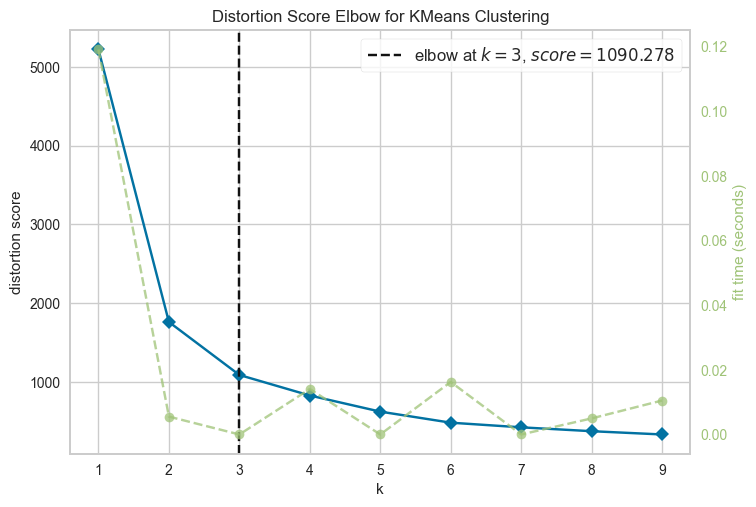

,Gender,Age,Quantity,Price per Unit,Total Amount,Product Category_Beauty,Product Category_Books,Product Category_Clothing,Product Category_Electronics,Product Category_Food,Product Category_Home,Quantity_binned,Total_Amount_binned,Cluster
0,1,-0.592433,-0.524125,-1.143912,-0.850306,True,False,False,False,False,False,Low,Low,1
1,0,-1.144961,-0.882137,-0.400108,-0.656939,False,False,True,False,False,False,Low,Low,1
2,1,0.512623,-1.240150,-1.176970,-0.877605,False,False,False,True,False,False,Low,Low,1
3,1,-0.385235,-1.240150,-0.400108,-0.770684,False,False,True,False,False,False,Low,Low,1
4,1,-0.868697,-0.882137,-1.143912,-0.861681,True,False,False,False,False,False,Low,Low,1


In [28]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(scaled_data)
visualizer.show()
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(scaled_data)
labels = kmeans.labels_
retail_df['Cluster'] = labels
retail_df.head()

## **b. Evaluasi Model Clustering**


### 1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.


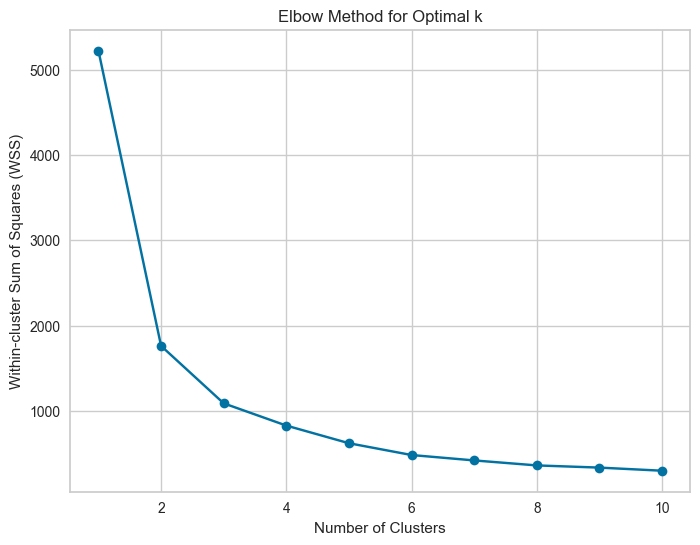

In [29]:
wss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    wss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.show()

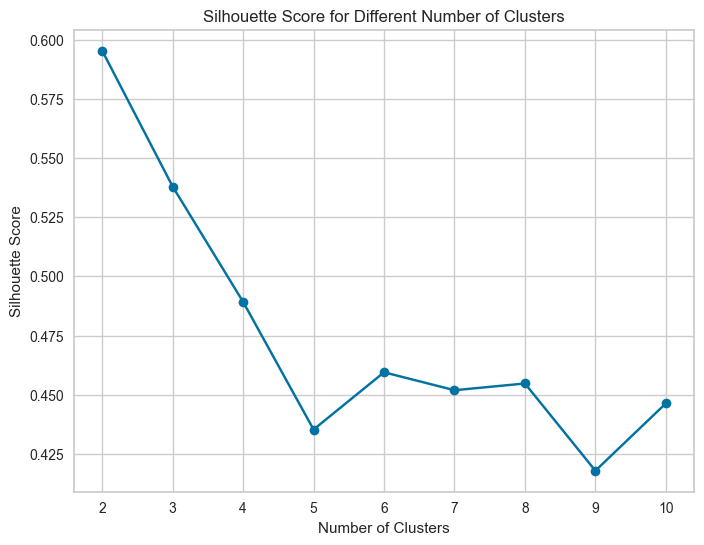

In [30]:
from sklearn.metrics import silhouette_score

sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    sil_scores.append(score)


plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

### 2.Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [31]:
from sklearn.metrics import silhouette_score

sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    sil_scores.append(score)
    print(f'k={k}, Silhouette Score={score:.3f}')

optimal_k_sil = 2 + sil_scores.index(max(sil_scores))
print(f'Optimal k berdasarkan Silhouette Score: {optimal_k_sil}')


k=2, Silhouette Score=0.595
k=3, Silhouette Score=0.538
k=4, Silhouette Score=0.489
k=5, Silhouette Score=0.435
k=6, Silhouette Score=0.459
k=7, Silhouette Score=0.452
k=8, Silhouette Score=0.455
k=9, Silhouette Score=0.418
k=10, Silhouette Score=0.446
Optimal k berdasarkan Silhouette Score: 2


In [32]:
total_sil_score = sum(sil_scores)
print(f'Jumlah total Silhouette Scores: {total_sil_score:.3f}')

Jumlah total Silhouette Scores: 4.288


### Evaluasi dari Elbow Method dan Silhouette Score

- Elbow Method merekomendasikan **k = 4** karena penurunan WSS mulai melambat setelah titik tersebut, menunjukkan kluster optimal tanpa menambah kompleksitas.

- Silhouette Score merekomendasikan **k = 2** karena nilai tertinggi tercapai pada jumlah kluster ini, menunjukkan pemisahan kluster yang lebih baik.

## **c. Feature Selection (Opsional)**


Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

Saya memutuskan untuk **tidak melakukan feature selection** lebih lanjut **karena fitur-fitur yang tidak relevan, seperti Transaction ID, Date, dan Customer ID, sudah dihapus sebelumnya.** Oleh karena itu, melanjutkan ke tahap pemodelan tanpa feature selection sudah cukup

## **d. Visualisasi Hasil Clustering**



Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

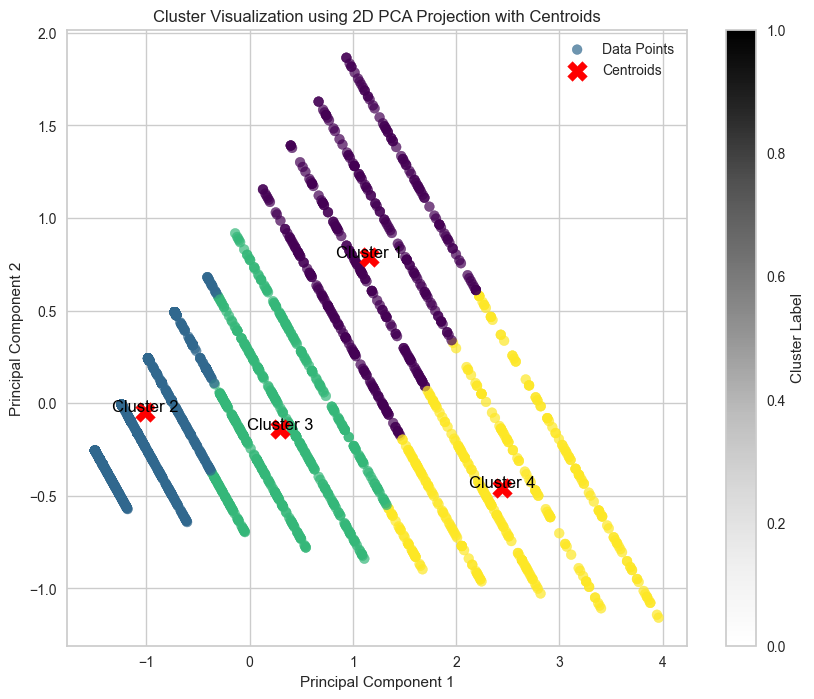

In [33]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
plt.figure(figsize=(10, 8))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7, label='Data Points')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker='X', label='Centroids')
for i, centroid in enumerate(centroids_pca):
    plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='black', fontsize=12, ha='center')


plt.title('Cluster Visualization using 2D PCA Projection with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.grid(True)
plt.show()


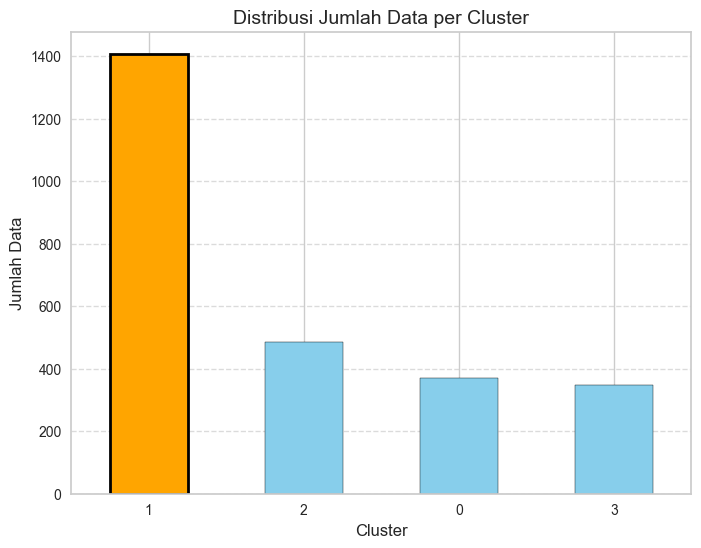

In [34]:
cluster_counts = retail_df['Cluster'].value_counts()

max_cluster = cluster_counts.idxmax()

plt.figure(figsize=(8, 6))

bars = cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')

for i, bar in enumerate(bars.patches):
    if cluster_counts.index[i] == max_cluster:
        bar.set_facecolor('orange')
        bar.set_linewidth(2)

plt.title('Distribusi Jumlah Data per Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Jumlah Data', fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**


### 1.Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia.


In [35]:
# Menghitung rata-rata dan statistik deskriptif untuk setiap cluster
cluster_analysis = retail_df.groupby('Cluster').agg({
    'Quantity': ['mean', 'std', 'min', 'max'],
    'Price per Unit': ['mean', 'std', 'min', 'max'],
    'Total Amount': ['mean', 'std', 'min', 'max']
}).reset_index()

cluster_analysis


Cluster  Quantity                               Price per Unit            \
               mean       std       min       max           mean       std   
0       0  1.377513  0.399904  0.907925  1.981963      -0.202433  0.497155   
1       1 -0.748645  0.404627 -1.240150  0.191900      -0.506126  0.812740   
2       2  0.112013  0.349347 -0.524125  0.549913       0.661160  0.793771   
3       3  1.408527  0.461250  0.549913  1.981963       1.339032  0.455485   

                      Total Amount                                
        min       max         mean       std       min       max  
0 -1.061267  0.889150     0.264240  0.528490 -0.725186  1.153890  
1 -1.185234  2.079235    -0.684403  0.212399 -0.878743  0.025534  
2 -1.061267  2.079235     0.309203  0.493917 -0.747935  1.379106  
3  0.261050  2.062707     2.052955  0.595607  1.162990  3.619893

### 2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

1. **Cluster 0:** High Quantity, Medium Spending
 - Quantity: Tinggi (1.38, rata-rata pembelian lebih besar dari cluster lain).
 - Price per Unit: Rendah (-0.20, pembelian barang dengan harga lebih murah).
 - Total Amount: Sedang (0.26, total pengeluaran cukup besar, tetapi tidak setinggi cluster lain).
 - **Interpretasi:** Pelanggan ini membeli dalam jumlah banyak tetapi barang dengan harga murah. Mereka cocok untuk penawaran berbasis kuantitas.

2. **Cluster 1:** Low Quantity, Low Spending
 - Quantity: Rendah (-0.75, pembelian sedikit).
 - Price per Unit: Rendah (-0.51, harga per unit lebih murah).
 - Total Amount: Rendah (-0.68, total pengeluaran juga rendah).
 - **Interpretasi:** Pelanggan ini membeli sedikit barang dengan nilai yang ekonomis. Mereka sensitif terhadap harga.

3. **Cluster 2:** Medium Quantity, High Spending
 - Quantity: Sedang (0.11, kuantitas pembelian mendekati rata-rata).
 - Price per Unit: Tinggi (0.66, barang yang dibeli harganya relatif premium).
 - Total Amount: Sedang (0.31, total pengeluaran lebih tinggi dari cluster 0 tetapi masih sedang).
 - **Interpretasi:**Pelanggan ini tidak membeli terlalu banyak, tetapi mereka membeli produk dengan harga lebih tinggi. Mereka memprioritaskan kualitas daripada kuantitas.

4. **Cluster 3:** High Quantity, High Spending
 - Quantity: Tinggi (1.41, pembelian sangat besar).
 - Price per Unit: Tinggi (1.34, harga barang yang dibeli premium).
 - Total Amount: Sangat Tinggi (2.05, total pengeluaran tertinggi dibandingkan semua cluster).
 - **Interpretasi:** Pelanggan ini adalah pembeli VIP dengan kontribusi pendapatan terbesar. Mereka membeli dalam jumlah besar dan memilih produk berkualitas tinggi atau premium.


**Rekomendasi Dan Strategi Bisnis yang cocok diterapkan**
1. **Cluster 0: Pelanggan Kuantitas Tinggi, Pengeluaran Sedang**
 - Pelanggan di cluster ini menunjukkan pola pembelian dalam jumlah besar dengan pengeluaran total yang cukup tinggi. Mereka cenderung mencari nilai ekonomis, sehingga **strategi seperti diskon untuk pembelian besar atau paket bundling** akan efektif untuk meningkatkan loyalitas dan volume transaksi mereka.

2. **Cluster 1: Pelanggan Kuantitas Rendah, Pengeluaran Rendah**
 - Cluster ini mencerminkan pelanggan dengan keterlibatan belanja rendah baik dari segi jumlah maupun nilai pembelian. Fokus strategi harus pada menarik minat mereka **melalui promosi agresif, penawaran produk harga terjangkau, dan bundling** untuk mendorong frekuensi serta nilai transaksi.

3. **Cluster 2: Pelanggan Kuantitas Sedang, Pengeluaran Tinggi**
 - Pelanggan ini lebih selektif dengan pembelian rata-rata namun nilai produk yang dipilih lebih premium. Mereka menghargai kualitas, sehingga pendekatan **melalui produk eksklusif, program loyalitas, dan rekomendasi personal** dapat meningkatkan retensi serta potensi belanja mereka.

4. **Cluster 3: Pelanggan Kuantitas Tinggi, Pengeluaran Tinggi**
 - Cluster ini adalah pelanggan dengan kontribusi pendapatan terbesar, membeli dalam jumlah besar dengan nilai tinggi. Strategi terbaik adalah memberikan **pengalaman eksklusif, layanan prioritas, dan program loyalitas premium** untuk menjaga hubungan jangka panjang serta memperkuat loyalitas mereka.

**Kesimpulan:**
Keempat cluster ini mencerminkan segmen pelanggan yang berbeda dan membutuhkan pendekatan bisnis yang disesuaikan. Optimalisasi strategi pada masing-masing segmen akan meningkatkan efektivitas penjualan, retensi pelanggan, dan keuntungan secara keseluruhan.

# 7. Mengeksport Data


## **Simpan hasilnya ke dalam file CSV.**

In [36]:
retail_df['Cluster'] = kmeans.labels_
retail_df.to_csv('hasil_clustering.csv', index=False)
print("Data berhasil disimpan dalam file hasil_clustering.csv")

Data berhasil disimpan dalam file hasil_clustering.csv
